<a href="https://colab.research.google.com/github/lvysher/cnn-image-classification/blob/main/image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOADING DATASET

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = "/content/drive/My Drive/image classification/data"
train_dir = f"{data_dir}/train"
test_dir = f"{data_dir}/test"

In [4]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [5]:
import tensorflow as tf

img_height, img_width = 150, 150
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    label_mode='binary'
)
class_names = train_ds.class_names
print("Class 0 is:", class_names[0])
print("Class 1 is:", class_names[1])


Found 557 files belonging to 2 classes.
Found 140 files belonging to 2 classes.
Class 0 is: cats
Class 1 is: dogs


In [6]:
import numpy as np

X_train = []
Y_train = []

for images, labels in train_ds:
    X_train.append(images.numpy())
    Y_train.append(labels.numpy())

X_train = np.concatenate(X_train)
Y_train = np.concatenate(Y_train)

print("Shape of X_train:", X_train.shape)
print("Shape of Y_train:", Y_train.shape)

Shape of X_train: (557, 150, 150, 3)
Shape of Y_train: (557, 1)


In [7]:
X_test = []
Y_test = []

for images, labels in test_ds:
    X_test.append(images.numpy())
    Y_test.append(labels.numpy())

X_test = np.concatenate(X_test)
Y_test = np.concatenate(Y_test)

print("Shape of X_test:", X_test.shape)
print("Shape of Y_test:", Y_test.shape)

Shape of X_test: (140, 150, 150, 3)
Shape of Y_test: (140, 1)


In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

MODEL

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation = 'relu', input_shape = (150, 150, 3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation = 'relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
history = model.fit(X_train,Y_train, epochs = 25, batch_size = 64)

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.5024 - loss: 0.7026
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.4940 - loss: 0.6952
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5139 - loss: 0.6927
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5144 - loss: 0.6926
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5319 - loss: 0.6917
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.5116 - loss: 0.6935
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5908 - loss: 0.6906
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6230 - loss: 0.6854
Epoch 9/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.6399 - loss: 0.6654
Epoch 10/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.5929 - loss: 0.6396
Epoch 11/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6378 - loss: 0.6349
Epoch 12/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.6801 - loss: 0.5940
Epoch 13/25
9

In [12]:
model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 307ms/step - accuracy: 0.6756 - loss: 1.4921


[1.4813722372055054, 0.6857143044471741]

In [13]:
idx = random.randint(0, len(X_test) - 1)
img = X_test[idx]

print("Image shape:", img.shape)
print("Data type:", img.dtype)
print("Pixel range:", np.min(img), "to", np.max(img))

Image shape: (150, 150, 3)
Data type: float32
Pixel range: 0.0 to 1.0


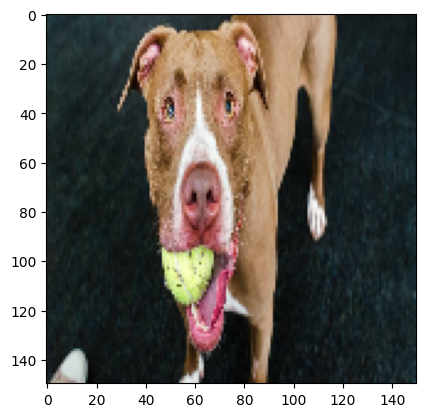

In [14]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

PREDICTING

In [15]:
loss, acc = model.evaluate(X_test, Y_test)
print(f"Test Accuracy: {acc:.2%}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 312ms/step - accuracy: 0.6756 - loss: 1.4921
Test Accuracy: 68.57%


In [16]:
!pip install -q gradio

In [17]:
import gradio as gr
from PIL import Image
import numpy as np

def predict_cat_dog(img):
    img = img.convert("RGB")
    img = img.resize((150, 150))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 150, 150, 3)

    y_pred = model.predict(img_array)
    label = 'Cat 🐱' if y_pred[0][0] < 0.5 else 'Dog 🐶'
    confidence = f"{y_pred[0][0]:.2f}"

    return f"Prediction: {label}\nConfidence: {confidence}"

In [18]:
interface = gr.Interface(
    fn=predict_cat_dog,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="🐾 Cat vs Dog Classifier",
    description="Upload an image of a cat or dog and see what the model thinks!"
)

In [19]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://09e9b3dc8fb9159c3d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
